# Departamento de Engenharia de Teleinformática
# Curso de Graduação em Engenharia de Telecomuniucações
# TI0077 - Inteligência Computacional Aplicada
## Homework 01 - Data Preprocessing

### Alunos:

- Ezequias Márcio Silva de Santana Júnior - 371887
- Ingrid Simões Moreira Furtado - 375147
- Yuri Sales Ribeiro - 375177

#### Observações:
Para utilizar esse notebook é necessario ter Python3 instalado, juntamente com os pacotes listados abaixo:

- ```numpy 1.16.2```
- ```pandas 0.24.2```
- ```matplotlib 3.0.3```
- ```seaborn 0.9.0```

Este notebook, os dados utilizados e eventuais tabelas e figuras salvas encontam-se disponiveis no seguinte 
repositório: 

In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

# Importing dataset:
data = pd.read_excel('mos_dataset.xlsx')

## O Conjunto de Dados

#TODO: descrição

['Signal (dBm)', 'Speed (m/s)', 'Distance from site (m)',
       'Call Test Duration (s)', 'Call Test Result', 'Call Test Technology',
       'Call Test Setup Time (s)', 'MOS']

Prof n viu problema no uso de uma fração dos dados...

Necessário dar load nos dados originais; fazer as dummys e o tratamento de não nulos e dos tipos de variáveis...

o resultado do teste tem duas falhas diferentes..., 

utilizar um slice do dado full...ou seja pegar o '''dataset_hw01.xlsx''' do dado original e fazer ele ficar igual

#TODO: descrição do conjunto de amostras utilizado

https://www.kaggle.com/sachingawade/mos-classifier

https://link.springer.com/content/pdf/10.1007%2Fs41233-018-0019-8.pdf

https://link.springer.com/content/pdf/10.1007%2Fs41233-016-0002-1.pdf

https://www.oreilly.com/library/view/voip-voice-and/9780470227367/ch003-sec009.html

https://www.voipmechanic.com/mos-mean-opinion-score.htm


In [227]:
# Visualizing data:
display(data.head())
# Display data info:
data.info()

,Date Of Test,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Result,Call Test Technology,Call Test Setup Time (s),MOS
0,2017-07-09 01:26:38,-85,0.00,254.62,90.0,SUCCESS,LTE,0.61,4.3
1,2017-07-09 01:29:10,-85,0.00,254.04,90.0,SUCCESS,LTE,0.59,4.3
2,2017-07-09 01:31:43,-85,0.00,253.78,90.0,SUCCESS,LTE,0.67,4.3
3,2017-07-09 01:32:39,-83,5.76,138.87,60.0,SUCCESS,UMTS,3.58,2.7
4,2017-07-09 01:34:15,-85,0.00,253.65,90.0,SUCCESS,LTE,0.64,4.3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Date Of Test                500 non-null datetime64[ns]
Signal (dBm)                500 non-null int64
Speed (m/s)                 500 non-null float64
Distance from site (m)      500 non-null float64
Call Test Duration (s)      500 non-null float64
Call Test Result            500 non-null object
Call Test Technology        500 non-null object
Call Test Setup Time (s)    500 non-null float64
MOS                         500 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 35.2+ KB


Como observado acima, faz-se necessário o tratamento das variáveis não numéricas, introduzindo $\textit{dummy variables}$ para representar os preditores categóricos `Call Test Result` e `Call Test Technology`.

In [228]:
print(f'''Categorical data:

{data['Call Test Result'].value_counts()}
      
{data['Call Test Technology'].value_counts()}''')

Categorical data:

SUCCESS                486
FAILURE - DROP CALL     14
Name: Call Test Result, dtype: int64
      
LTE     254
UMTS    236
GSM      10
Name: Call Test Technology, dtype: int64


In [229]:
# Transforming categorical data:
# in 'Call Test Result': 'SUCCESS' and 'FAILURE - DROP CALL' to 1 and 0:
data = data.replace(to_replace={'Call Test Result': 'SUCCESS'}, value=1)
data = data.replace(to_replace={'Call Test Result': 'FAILURE - DROP CALL'}, value=0)
print(data['Call Test Result'].value_counts(),'\n')

# in 'Call Test Technology': 'LTE', 'UMTS', and 'GSM' to 2, 1 and 0:
data = data.replace(to_replace={'Call Test Technology': 'LTE'}, value=2)
data = data.replace(to_replace={'Call Test Technology': 'UMTS'}, value=1)
data = data.replace(to_replace={'Call Test Technology': 'GSM'}, value=0)
print(data['Call Test Technology'].value_counts(),'\n')

1    486
0     14
Name: Call Test Result, dtype: int64 

2    254
1    236
0     10
Name: Call Test Technology, dtype: int64 



Observando os dados após a transformação, temos:

In [230]:
data.head(6)

,Date Of Test,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Result,Call Test Technology,Call Test Setup Time (s),MOS
0,2017-07-09 01:26:38,-85,0.00,254.62,90.0,1,2,0.61,4.3
1,2017-07-09 01:29:10,-85,0.00,254.04,90.0,1,2,0.59,4.3
2,2017-07-09 01:31:43,-85,0.00,253.78,90.0,1,2,0.67,4.3
3,2017-07-09 01:32:39,-83,5.76,138.87,60.0,1,1,3.58,2.7
4,2017-07-09 01:34:15,-85,0.00,253.65,90.0,1,2,0.64,4.3
5,2017-07-09 01:35:03,-103,-1.00,174.24,60.0,1,1,3.57,3.7


In [231]:
# Replacing negative values in 'Speed (m/s)':
data = data.replace(to_replace={'Speed (m/s)': -1}, value=0)

### Classes

Observando a disposição dos valores dos índices de MOS, identificamos que o conjunto de dados apresenta 30 classes:

In [232]:
# Printing the unique values of the 'MOS' column:
print(np.sort(data.MOS.unique()))
# Total values:
data.MOS.nunique()

[1.  1.2 1.5 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 3.  3.1 3.2
 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4]


30

#TODO: Justificar

Para simplificar o trabalho de classificação dos dados, ...  
De acordo com a ITU...

 bad nearly all users dissatisfied  
 poor many users dissatisfied  
 fair some users dissatisfied  
 good satisfied  
excelent very satisfied  

Reduzindo o numero de classes de a cordo com a recomendação fazemos:

In [237]:
# Transforming the 'MOS' column values into 5 classes (1-5):
data.loc[(data['MOS']>=1 )&(data['MOS']<2.6),'MOS'] = 1
data.loc[(data['MOS']>=2.6 )&(data['MOS']<3.1),'MOS'] = 2
data.loc[(data['MOS']>=3.1 )&(data['MOS']<3.6),'MOS'] = 3
data.loc[(data['MOS']>=3.6 )&(data['MOS']<4.1),'MOS'] = 4
data.loc[(data['MOS']>=4.1 )&(data['MOS']<5),'MOS'] = 5

Desse modo, temos os dados distribuidos nas classes como ilustrado na célula abaixo:

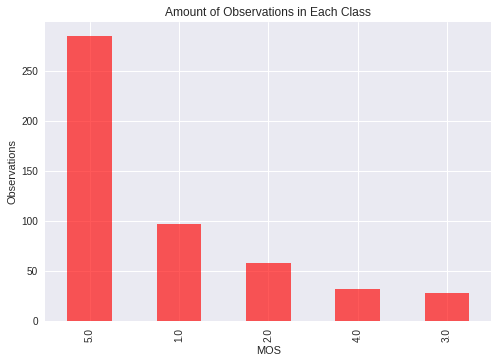

In [234]:
# Bar plot of the amount of samples of each class:
plt.figure()
data['MOS'].value_counts().plot.bar(color='red', alpha=0.65)
plt.title('Amount of Observations in Each Class')
plt.ylabel('Observations')
plt.xlabel('MOS')
plt.show()
# plt.savefig('hw01-figs/classes.pdf')

## Pré-Processamento

In [235]:
# Saving the data into a new variable, excluding the date-time information:
datahw01 = data.drop("Date Of Test", axis=1)
datahw01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Signal (dBm)                500 non-null int64
Speed (m/s)                 500 non-null float64
Distance from site (m)      500 non-null float64
Call Test Duration (s)      500 non-null float64
Call Test Result            500 non-null int64
Call Test Technology        500 non-null int64
Call Test Setup Time (s)    500 non-null float64
MOS                         500 non-null float64
dtypes: float64(5), int64(3)
memory usage: 31.3 KB


### Unconditional mono-variate analysis

#TODO: comments !!!!!!!!!!!!!

In [236]:
unc_monovar = datahw01.describe().iloc[1:3,:-1].append(datahw01.skew()[:-1], ignore_index=True)
unc_monovar.index = ['Mean $\mu_d$','std $\sigma_d$','Skewness $\gamma_d$']
# unc_monovar.to_excel('hw01-results/hw01-data/unc_monovar.xlsx')
display(unc_monovar)

,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Result,Call Test Technology,Call Test Setup Time (s)
Mean $\mu_d$,-85.344000,18.775340,1818.475340,98.963120,0.972000,1.488000,1.054960
std $\sigma_d$,11.640131,25.887133,5640.907530,112.807773,0.165138,0.538922,1.562370
Skewness $\gamma_d$,-0.239259,1.115417,5.815732,6.770365,-5.739391,-0.337844,4.751219


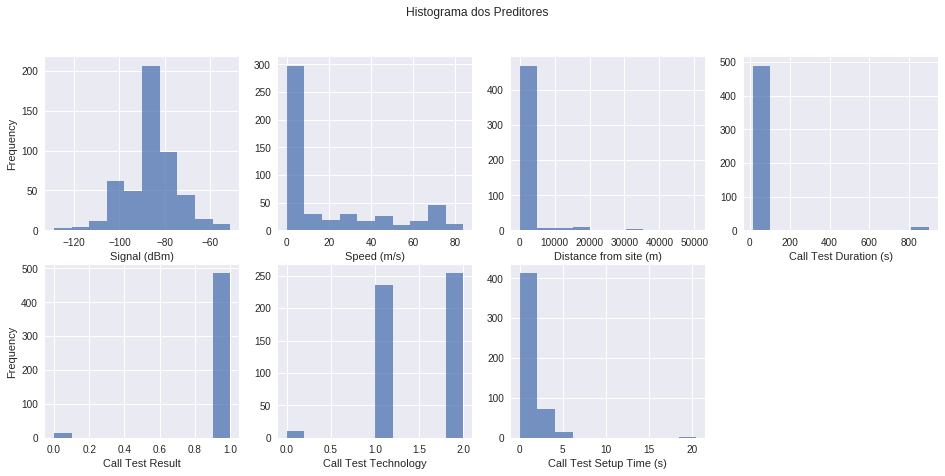

In [239]:
fig, ax = plt.subplots(2, 4, figsize=(16, 7)) 
ax = ax.ravel()
fig.suptitle('Histograma dos Preditores')
for i in range(0, 7):
    ax[i].set_xlabel(datahw01.columns[i])
    ax[0].set_ylabel('Frequency')
    ax[4].set_ylabel('Frequency')
    ax[i].hist(datahw01.iloc[:, i], bins='sturges', alpha=.75)
fig.delaxes(ax[7])
#     plt.savefig('hw01-figs/hist_data.pdf')

## Class-conditional mono-variate analysis

In [266]:
cls = datahw01.groupby('MOS')
classes = ['Bad (1)', 'Poor (2)', 'Fair (3)', 'Good (4)', 'Excellent (5)']
cls_monovar = []

for i in range(len(cls.indices)):
    cls_monovar.append(cls.get_group(i+1).describe().iloc[1:3,:-1].append(cls.get_group(i+1).skew()[:-1], 
                                                                          ignore_index=True))
    cls_monovar[i].index = ['Mean $\mu_{d|l_%d}$'%(i+1),'std $\sigma_{d|l_%d}$'%(i+1),
                            'Skewness $\gamma_{d|l_%d}$'%(i+1)]
    display(classes[i], cls_monovar[i])

'Bad (1)'

,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Result,Call Test Technology,Call Test Setup Time (s)
Mean $\mu_{d|l_1}$,-81.463918,44.362371,6327.785052,140.102887,0.917526,0.938144,0.609381
std $\sigma_{d|l_1}$,12.091717,26.122667,11365.981654,206.400716,0.276515,0.316703,2.290568
Skewness $\gamma_{d|l_1}$,-1.010486,-0.410527,2.429454,3.366722,-3.083493,-1.403008,7.169516


'Poor (2)'

,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Result,Call Test Technology,Call Test Setup Time (s)
Mean $\mu_{d|l_2}$,-76.051724,12.871724,543.495517,94.618621,0.982759,0.982759,2.888103
std $\sigma_{d|l_2}$,13.361929,20.522561,843.054645,153.987608,0.131306,0.228756,1.632483
Skewness $\gamma_{d|l_2}$,-0.390879,2.109488,3.122431,5.189936,-7.615773,-1.283287,-1.061204


'Fair (3)'

,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Result,Call Test Technology,Call Test Setup Time (s)
Mean $\mu_{d|l_3}$,-77.642857,41.687500,2236.354643,90.0,1.0,1.0,0.35750
std $\sigma_{d|l_3}$,6.135593,23.464373,3392.570560,0.0,0.0,0.0,0.34453
Skewness $\gamma_{d|l_3}$,-0.758480,-0.225518,2.094909,0.0,0.0,0.0,0.37773


'Good (4)'

,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Result,Call Test Technology,Call Test Setup Time (s)
Mean $\mu_{d|l_4}$,-94.625000,6.494688,313.274062,63.750000,1.0,1.0,3.255625
std $\sigma_{d|l_4}$,13.094569,16.949717,478.124908,10.080323,0.0,0.0,1.265515
Skewness $\gamma_{d|l_4}$,1.485434,2.837990,3.105268,2.380876,0.0,0.0,-1.804981


'Excellent (5)'

,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Result,Call Test Technology,Call Test Setup Time (s)
Mean $\mu_{d|l_5}$,-88.270175,10.396070,671.147649,90.679649,0.982456,1.880702,0.654982
std $\sigma_{d|l_5}$,9.142879,20.214575,1451.940643,48.891122,0.131517,0.324709,0.534933
Skewness $\gamma_{d|l_5}$,-0.961475,2.090838,8.235550,16.052385,-7.388629,-2.361449,5.026289


# TODO: consertar plot

IndexError: list index out of range

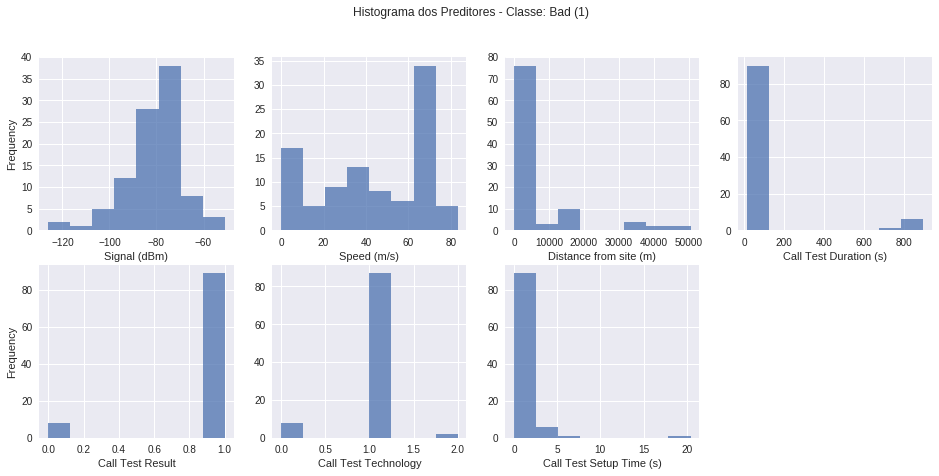

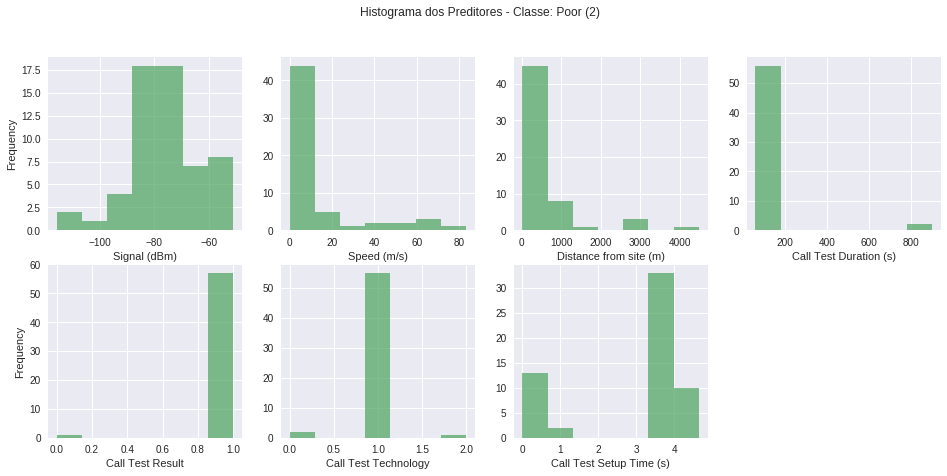

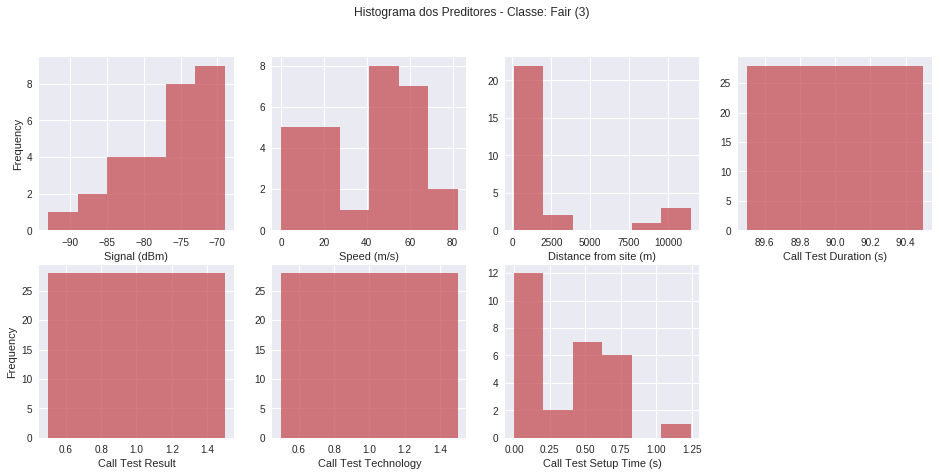

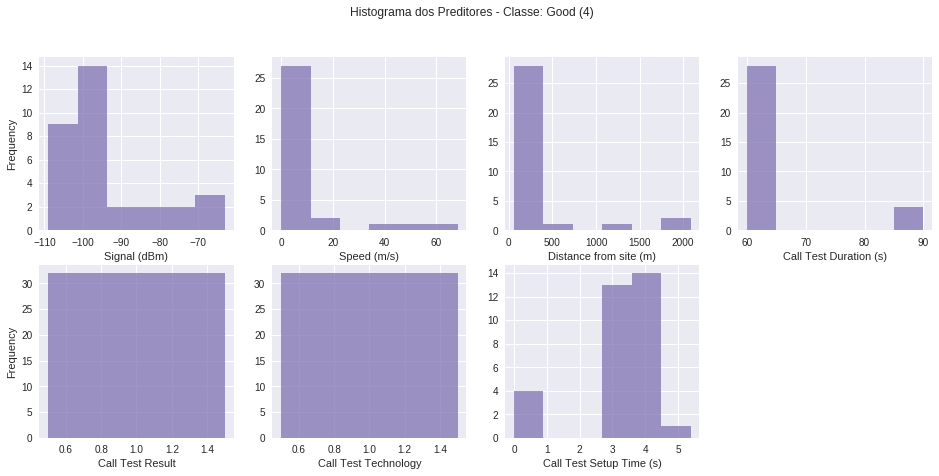

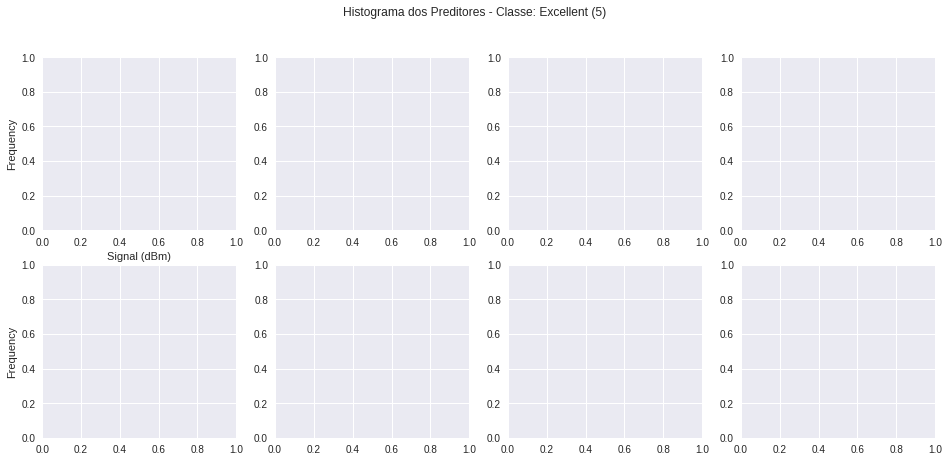

In [284]:
color=['C0','C1','C2','C3']
for j in cls.indices:
    fig, ax = plt.subplots(2, 4, figsize=(16, 7)) 
    ax = ax.ravel()
    fig.suptitle(f'Histograma dos Preditores - Classe: {classes[int(j)-1]}')
    for i in range(0, 8):
        ax[i].set_xlabel(cls.get_group(int(j)).columns[i])
        ax[0].set_ylabel('Frequency')
        ax[4].set_ylabel('Frequency')
        ax[i].hist(cls.get_group(j).iloc[:, i], bins='sturges', color=color[int(j)-1], alpha=.75)
    fig.delaxes(ax[7])
#     plt.savefig(f'hw01-figs/hist_C{j}.pdf')

## Tranformações no dados

centering and scaling

In [289]:
scaled_datahw01 = datahw01.iloc[:,:-1]
scaled_datahw01 = (scaled_datahw01 - scaled_datahw01.mean())/scaled_datahw01.std()
scaled_datahw01.head()

# Apenas p/ visualização do normalizado
# fig, ax = plt.subplots(2, 4, figsize=(16, 7)) 
# ax = ax.ravel()
# fig.suptitle('Histograma dos Preditores')
# for i in range(0, 7):
#     ax[i].set_xlabel(scaled_datahw01.columns[i])
#     ax[0].set_ylabel('Frequency')
#     ax[4].set_ylabel('Frequency')
#     ax[i].hist(scaled_datahw01.iloc[:, i], bins='sturges', alpha=.75)

,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Result,Call Test Technology,Call Test Setup Time (s)
0,0.029553,-0.725277,-0.277235,-0.079455,0.169555,0.950045,-0.284798
1,0.029553,-0.725277,-0.277338,-0.079455,0.169555,0.950045,-0.297599
2,0.029553,-0.725277,-0.277384,-0.079455,0.169555,0.950045,-0.246395
3,0.201372,-0.502773,-0.297754,-0.345394,0.169555,-0.905511,1.616160
4,0.029553,-0.725277,-0.277407,-0.079455,0.169555,0.950045,-0.265596


##  Unconditional bi-variate analysis

Matriz de Correlação e Scatter plot dos preditores

In [290]:
data_pair_corr = scaled_datahw01.corr()
data_pair_corr

,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Result,Call Test Technology,Call Test Setup Time (s)
Signal (dBm),1.000000,0.052613,0.059475,-0.022853,0.250403,-0.345037,-0.011850
Speed (m/s),0.052613,1.000000,0.341599,0.046976,-0.199435,-0.407740,-0.244430
Distance from site (m),0.059475,0.341599,1.000000,0.121272,-0.007473,-0.265118,-0.150781
Call Test Duration (s),-0.022853,0.046976,0.121272,1.000000,-0.003806,-0.177652,-0.160464
Call Test Result,0.250403,-0.199435,-0.007473,-0.003806,1.000000,0.086288,-0.089949
Call Test Technology,-0.345037,-0.407740,-0.265118,-0.177652,0.086288,1.000000,-0.197427
Call Test Setup Time (s),-0.011850,-0.244430,-0.150781,-0.160464,-0.089949,-0.197427,1.000000


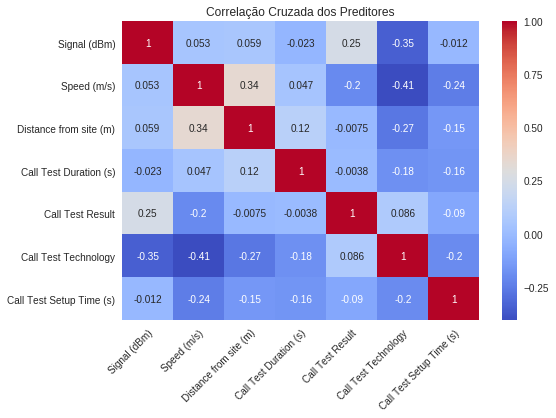

In [291]:
ax = sns.heatmap(data_pair_corr, annot=True, cmap='coolwarm')
ax.set_title('Correlação Cruzada dos Preditores')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
fig = ax.get_figure()
plt.show()
# fig.savefig('hw01-figs/data_corr.pdf', bbox_inches='tight')

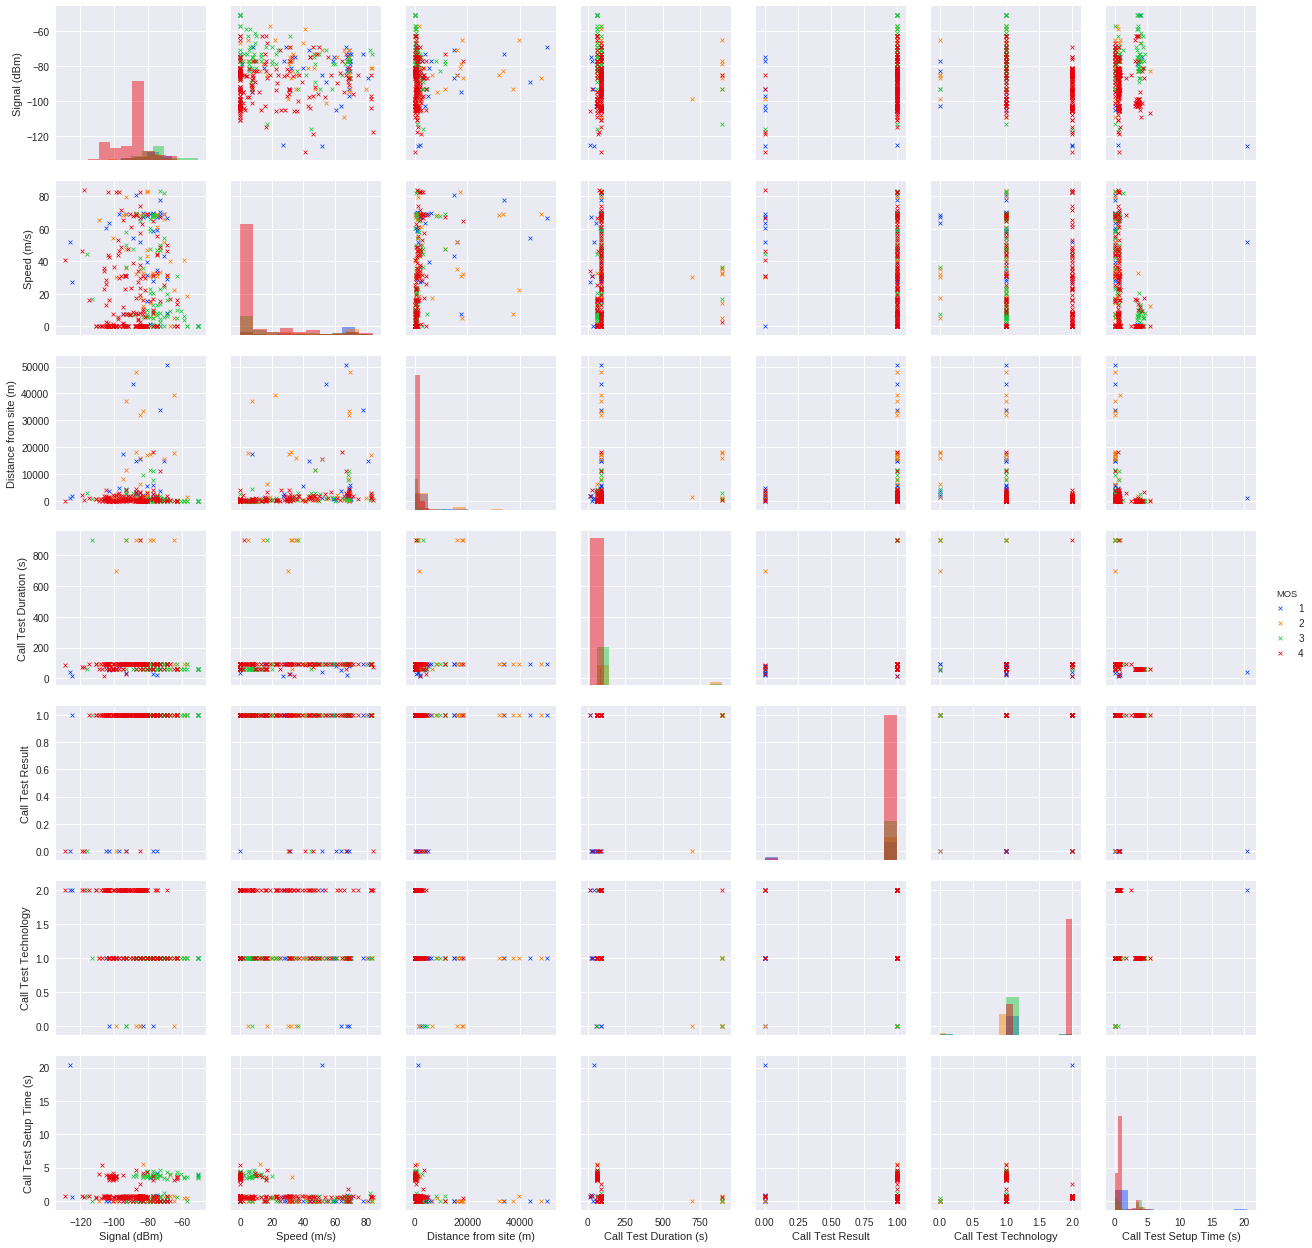

In [13]:
ax = sns.pairplot(datahw01, hue='MOS', palette='bright', vars=datahw01.columns[:-1], 
                  diag_kind='hist', plot_kws={"s": 15, "marker": 'x'}, diag_kws={"alpha": 0.45})
# ax.fig.savefig('hw01-figs/data_scatter.png', dpi=400)

## Q4 PCA Unconditional multi-variate analysis

usando ```scaled_datahw01```

Perform an unconditional multi-variate analysis of the predictors. Specifically, you
must perform a principal components analysis of the predictors, retain only the
first two principal components (those associated with the two largest eigenvalues)
and plot the scatter plot of the projected observations. Again, for each projected
point (observation) you must use colours or symbols to indicate the associated class
label. [Remember to perform the necessary pre-processing of the data]
Are the classes well (or better) separated? Are the boundaries between classes linear?
What classes show a high degree of overlap and thus are harder to separate?

In [27]:
# dado ja normalizado -> tira a COV
np.set_printoptions(4)
mt_cov = scaled_datahw01.cov().values
mt_cov

array([[ 1.    ,  0.0526,  0.0595, -0.0229,  0.2504, -0.345 , -0.0118],
       [ 0.0526,  1.    ,  0.3416,  0.047 , -0.1994, -0.4077, -0.2444],
       [ 0.0595,  0.3416,  1.    ,  0.1213, -0.0075, -0.2651, -0.1508],
       [-0.0229,  0.047 ,  0.1213,  1.    , -0.0038, -0.1777, -0.1605],
       [ 0.2504, -0.1994, -0.0075, -0.0038,  1.    ,  0.0863, -0.0899],
       [-0.345 , -0.4077, -0.2651, -0.1777,  0.0863,  1.    , -0.1974],
       [-0.0118, -0.2444, -0.1508, -0.1605, -0.0899, -0.1974,  1.    ]])

In [28]:
val, vec = np.linalg.eig(mt_cov)
val, vec
#TODO: Seleção dos dois maiores auto valores... indices...

(array([1.8445, 0.3198, 0.5588, 0.7593, 0.9638, 1.3149, 1.239 ]),
 array([[-0.259 , -0.2991, -0.4926,  0.3602, -0.113 , -0.6639, -0.1322],
        [-0.5572, -0.4916,  0.4809,  0.2218, -0.3221,  0.2466,  0.0529],
        [-0.4792, -0.0328, -0.3792, -0.7573, -0.137 ,  0.1224, -0.1349],
        [-0.2386, -0.2422, -0.0056,  0.0712,  0.8914,  0.1436, -0.2531],
        [ 0.0995, -0.0112,  0.5614, -0.3234, -0.0223, -0.5115, -0.555 ],
        [ 0.549 , -0.6475, -0.2189, -0.0723, -0.1668,  0.2954, -0.3334],
        [ 0.1569, -0.4357,  0.1381, -0.3642,  0.2043, -0.3374,  0.6916]]))

In [29]:
phi = np.stack([vec[:,0], vec[:,5]], axis=1)
print(phi)
# Aplicando transformação (progeção - produto escalar)
pc = scaled_datahw01.dot(phi)
pc.head()

[[-0.259  -0.6639]
 [-0.5572  0.2466]
 [-0.4792  0.1224]
 [-0.2386  0.1436]
 [ 0.0995 -0.5115]
 [ 0.549   0.2954]
 [ 0.1569 -0.3374]]


,0,1
3500,1.042053,0.046187
3501,1.040094,0.050494
3502,1.048148,0.033212
3503,0.226319,-1.243291
3504,1.045147,0.039688


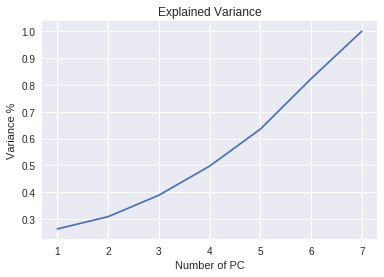

In [30]:
# Importância de cada pc
significance = np.cumsum(np.abs(val)/val.sum())
plt.figure()
plt.plot(np.arange(7)+1, significance)
plt.title('Explained Variance')
plt.xlabel('Number of PC')
plt.ylabel('Variance')
plt.show()

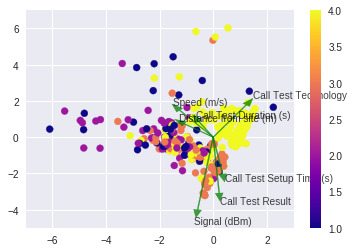

In [39]:
plt.figure()
plt.scatter(pc.iloc[:,0],pc.iloc[:,1], c=datahw01['MOS'], cmap='plasma')

for i in range(len(phi)):
    # arrows project features as vectors - PC axes
    plt.arrow(0, 0, phi[i, 0]*np.max(pc.iloc[:,0].values), 
                    phi[i, 1]*np.max(pc.iloc[:,1].values),
                    color='g', width=0.04, head_width=0.3, alpha=0.75)
    # text
    plt.text(phi[i,0]*np.max(pc.iloc[:,0])*1.2, 
             phi[i, 1]*max(pc.iloc[:,1])*1.2,
             datahw01.columns.values[i], color='k', alpha=0.75)
plt.axis([ -7, 3, -5,7])
plt.colorbar()
plt.show()
#plt.savefig('hw01-figs/pcaBiplot.pdf')